In [56]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [57]:
testperson = 5

In [58]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Tobias_5.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.268889,1,1,-73.831360,-17.560701,822.269531,-10.412904,-10.853800,825.489624,0.628535,...,2.774399,2.972366,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive
1,0.278813,1,1,-73.831360,-17.560701,822.269531,-10.432219,-10.814830,825.153809,0.628535,...,2.774399,2.973846,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive
2,0.289767,1,1,-73.875450,-17.442757,821.986145,-10.449097,-10.779257,825.044434,0.628654,...,2.794922,2.995605,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive
3,0.301716,1,1,-73.898537,-17.345325,821.805054,-10.461680,-10.742032,824.962402,0.628721,...,2.806473,2.975464,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive
4,0.311673,1,1,-73.898537,-17.345325,821.805054,-10.479289,-10.619119,824.920471,0.628721,...,2.806473,2.977463,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive
5,0.323624,1,1,-73.902695,-17.208088,821.626526,-10.482763,-10.578952,824.850891,0.628755,...,2.816818,2.975815,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive
6,0.334575,1,1,-73.883064,-17.133648,821.470947,-10.480173,-10.564904,824.784607,0.628744,...,2.812820,2.992355,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive
7,0.344546,1,1,-73.883064,-17.133648,821.470947,-10.456313,-10.553592,824.510559,0.628744,...,2.812820,2.999969,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive
8,0.356482,1,1,-73.802719,-17.101191,821.191650,-10.420872,-10.572582,824.394409,0.628647,...,2.800095,3.007645,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive
9,0.368432,1,1,-73.714333,-17.096941,820.966064,-10.376966,-10.596051,824.292297,0.628528,...,2.755371,3.018341,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive


In [59]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(290766, 39)

In [60]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P04_text.txt', 'AI_HC_P04_MCQ.txt', 'AI_HC_P04_FIBQ.txt',
       'OR_HC_P04_text.txt', 'OR_HC_P04_MCQ.txt', 'OR_HC_P04_FIBQ.txt',
       'AI_SK_P04_text.txt', 'AI_SK_P04_MCQ.txt', 'AI_SK_P04_FIBQ.txt',
       'OR_SK_P04_text.txt', 'OR_SK_P04_MCQ.txt', 'OR_SK_P04_FIBQ.txt',
       'AI_KB_P04_text.txt', 'AI_KB_P04_MCQ.txt', 'AI_KB_P04_FIBQ.txt',
       'OR_KB_P04_text.txt', 'OR_KB_P04_MCQ.txt', 'OR_KB_P04_FIBQ.txt'],
      dtype=object)

In [61]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-129.466782,-13.662786,737.731995,-66.422379,-8.127271,746.069275,0.751157,...,2.560120,2.764557,True,OR_SK_P04_text.txt,4.0,22.0,Times New Roman,SK,False,Immersive
1,0.011153,1,1,-129.556061,-13.684297,738.067871,-66.499229,-8.148593,746.371460,0.751216,...,2.578613,2.751358,True,OR_SK_P04_text.txt,4.0,22.0,Times New Roman,SK,False,Immersive
2,0.022494,1,1,-129.740555,-13.730213,738.978394,-66.617683,-8.227938,747.330750,0.751264,...,2.573822,2.751801,True,OR_SK_P04_text.txt,4.0,22.0,Times New Roman,SK,False,Immersive
3,0.033821,1,1,-129.722519,-13.717925,738.927734,-66.593750,-8.248006,747.265076,0.751247,...,2.563904,2.752502,True,OR_SK_P04_text.txt,4.0,22.0,Times New Roman,SK,False,Immersive
4,0.044330,1,1,-129.714447,-13.719579,738.920837,-66.576454,-8.271057,747.260986,0.751233,...,2.563171,2.768341,True,OR_SK_P04_text.txt,4.0,22.0,Times New Roman,SK,False,Immersive


In [62]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,705.815506,718.076706,393.017650,454.556623
1,0.011153,686.836777,686.925125,391.845503,469.335423
2,0.022494,661.717148,663.011932,402.705832,469.374733
3,0.033821,642.938690,662.125626,388.627925,473.973541
4,0.044330,643.576965,668.464355,397.373257,490.409603
...,...,...,...,...,...
40001,455.548922,1809.093018,1973.027039,951.411896,932.074070
40002,455.559466,1813.112793,1965.265045,961.401043,928.113756
40003,455.570905,1816.841125,1956.706085,950.249233,928.747702
40004,455.581844,1829.409485,1941.916656,949.327583,923.129826


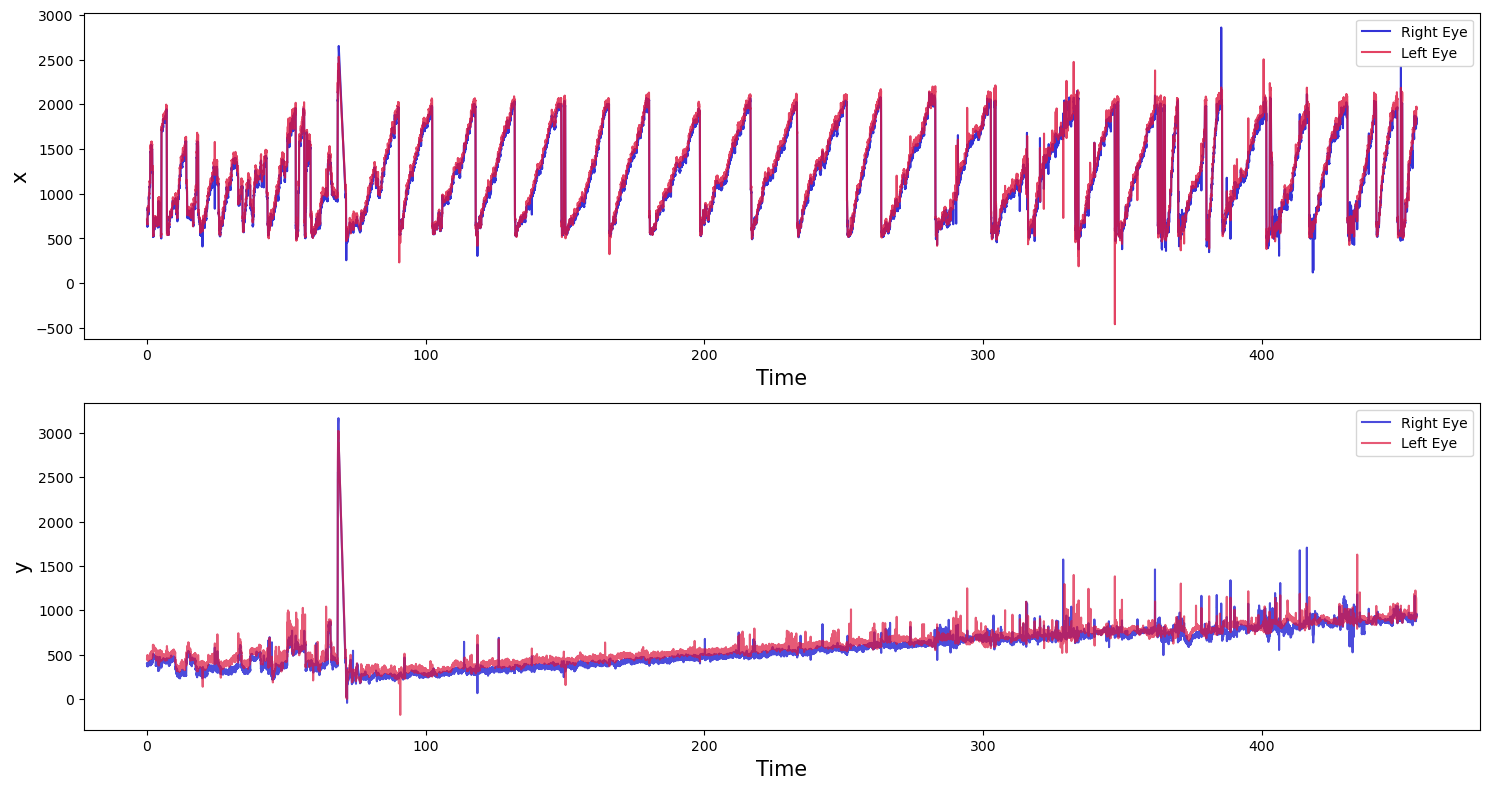

In [63]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [64]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [65]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [66]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [67]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,849.652328,900.887680,410.828032,477.382178
1,0.011510,846.462936,901.515350,408.545151,484.603243
2,0.022092,854.906921,901.515350,409.694424,484.603243
3,0.033101,849.939651,901.038132,400.761595,501.563044
4,0.045089,842.903519,908.940582,392.886329,496.348400
...,...,...,...,...,...
248,2.753156,620.415840,683.528366,394.404631,435.623960
249,2.764818,623.344498,678.281250,399.661889,433.866148
250,2.775998,612.931824,666.495209,409.401655,432.614865
251,2.786513,600.290565,666.495209,402.471428,432.614865


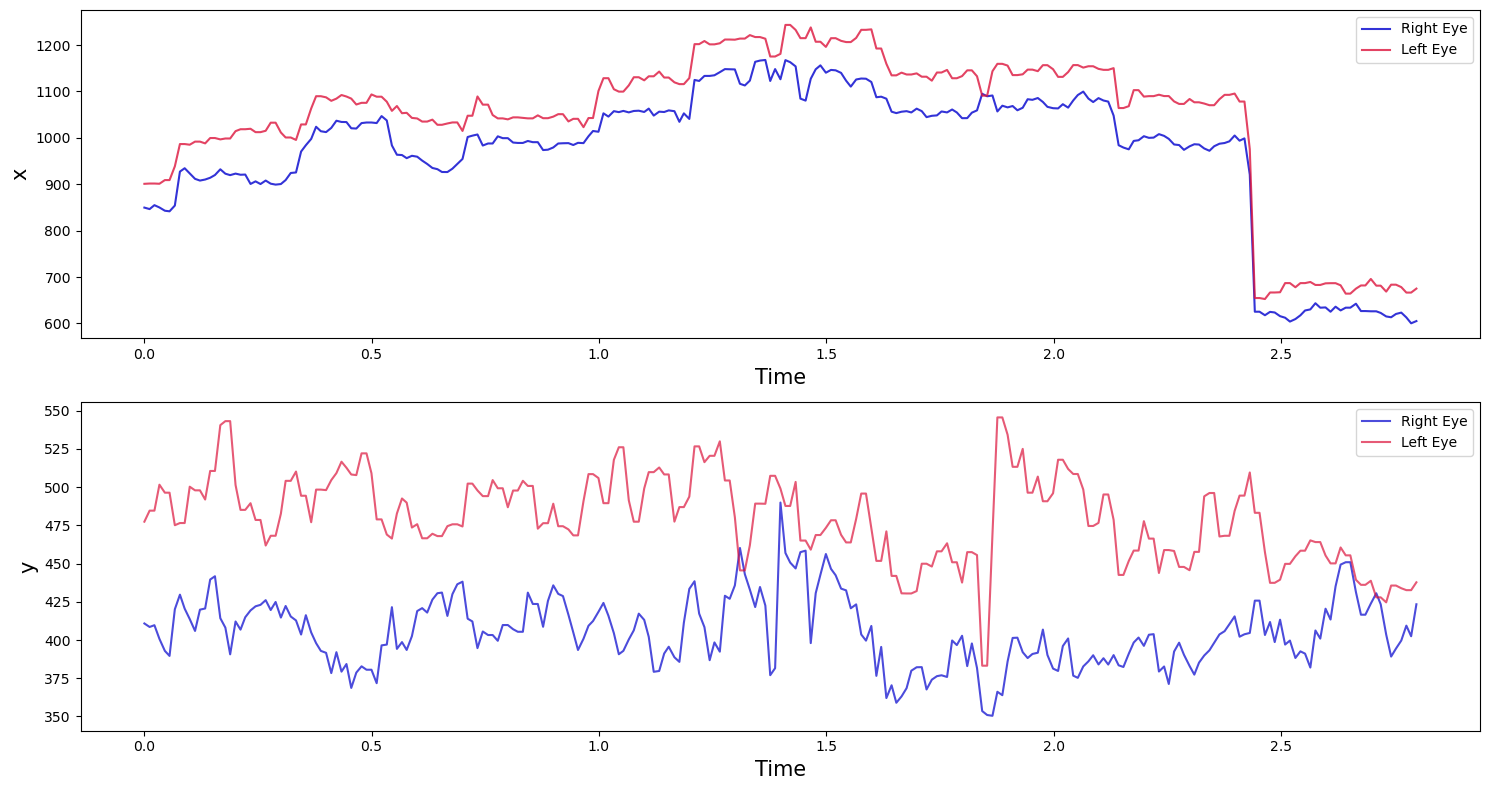

In [68]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


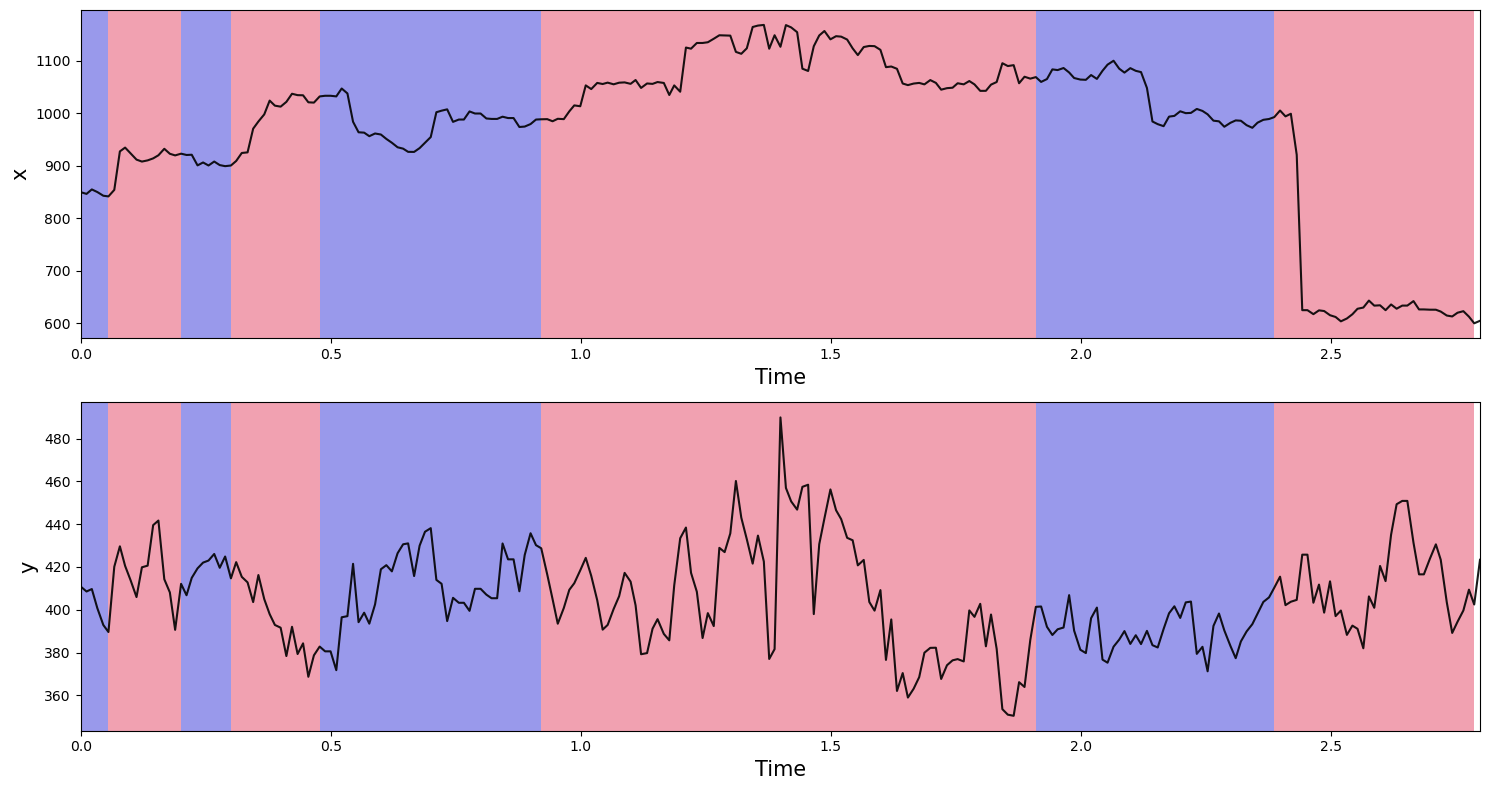

In [69]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [70]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to 

In [71]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-92.090645,-21.053076,804.962280,-28.107948,-18.348125,809.710144,0.663814,...,2.626984,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Skimming,0
1,0.011958,1,1,-92.149811,-21.062767,804.957825,-28.168091,-18.345282,809.710327,0.663921,...,2.635727,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Skimming,0
2,0.021932,1,1,-92.189667,-21.070356,804.944580,-28.218199,-18.338564,809.699097,0.663994,...,2.632767,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Skimming,0
3,0.032938,1,1,-92.344780,-21.104954,804.885010,-28.369442,-18.322416,809.653503,0.664283,...,2.615494,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Skimming,0
4,0.044902,1,1,-92.391212,-21.112883,804.861084,-28.420635,-18.315748,809.632874,0.664370,...,2.597229,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Skimming,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,21.474541,1,1,-81.251915,-16.941294,799.129211,-17.780094,-16.470295,803.069336,0.645539,...,2.554871,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Skimming,0
1924,21.484488,1,1,-81.401192,-16.966578,799.113403,-17.963360,-16.545937,803.064087,0.645810,...,2.527161,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Skimming,0
1925,21.496457,1,1,-81.464272,-16.971581,799.117737,-17.999529,-16.558374,803.071533,0.645922,...,2.513519,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Skimming,0
1926,21.507458,1,1,-81.525345,-16.977053,799.219360,-18.071705,-16.574549,803.197693,0.646013,...,2.512543,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Skimming,0


In [72]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [73]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-73.831360,-17.560701,822.269531,-10.412904,-10.853800,825.489624,0.628535,...,2.972366,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive,1
1,0.009924,1,1,-73.831360,-17.560701,822.269531,-10.432219,-10.814830,825.153809,0.628535,...,2.973846,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive,1
2,0.020878,1,1,-73.875450,-17.442757,821.986145,-10.449097,-10.779257,825.044434,0.628654,...,2.995605,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive,0
3,0.032827,1,1,-73.898537,-17.345325,821.805054,-10.461680,-10.742032,824.962402,0.628721,...,2.975464,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive,0
4,0.042784,1,1,-73.898537,-17.345325,821.805054,-10.479289,-10.619119,824.920471,0.628721,...,2.977463,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,108.672937,1,1,-89.599930,-17.444700,808.455139,-26.013889,-12.460037,812.946411,0.658641,...,2.717453,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive,0
6365,108.683906,1,1,-89.556541,-17.450989,808.488647,-25.974333,-12.462917,812.974731,0.658558,...,2.685760,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive,0
6366,108.694877,1,1,-89.525169,-17.458984,808.507507,-25.944103,-12.459093,812.991211,0.658499,...,2.653900,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive,0
6367,108.705880,1,1,-89.376358,-17.471880,808.525024,-25.797684,-12.448145,812.995667,0.658232,...,2.652786,True,AI_HC_P04_text.txt,4.0,22.0,Times New Roman,HC,False,Immersive,0


In [74]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [75]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [76]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")